In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
seen_df = pd.read_csv('data/0a_labelled_documents.csv')
unseen_df = pd.read_csv('data/0b_unlabelled_documents.csv')

df = (pd.concat([seen_df,unseen_df])
      .sort_values('id')
      .sample(frac=1, random_state=1)
      .reset_index(drop=True)
     )

seen_index = df[df['seen']==1].index
unseen_index = df[df['seen']==0].index
print(df.shape)

# Get a list of predictions for the unseen documents
y_pred = np.load('data/predictions.npy')
df['prediction'] = df['relevant']
df.loc[unseen_index,"prediction"] = y_pred[:,1]

# Get a list of multilabel predictions for the unseen documents
pred_rel_index = df[(df['prediction']>=0.5) & (df['prediction']<1)].index
y_pred = np.load('data/m_predictions.npy')
df = df.rename(columns={"1 - Impact": "1 - Impacts"})
classes = ["1 - Mitigation","1 - Adaptation", "1 - Impacts"]
for i, c in enumerate(classes):
    df[f'{c} - prediction'] = df[c]
    df.loc[pred_rel_index,f'{c} - prediction'] = y_pred[:,i]

df = df[df['prediction']>0.5]

df.to_csv('data/included_docs.csv',index=False)
print(df.shape)

df.head()

(699525, 14)
(22054, 18)


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,1 - Mitigation,wosarticle__dt,tslug,UT__UT,prediction,1 - Mitigation - prediction,1 - Adaptation - prediction,1 - Impacts - prediction
52,4963912,Objective To explore the association between n...,Exploration of the association between meteoro...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,explorationoftheassociationbetweenmeteorologic...,2-s2.0-85123003389,0.790797,0.010609,0.006835,0.980508
69,4729030,Background. Acute gastroenteritis is a cause o...,ACUTE GASTROENTERITIS IN 3 COMMUNITY-BASED NUR...,1995.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,acutegastroenteritisin3communitybasednursinghomes,WOS:A1995RY60500014,0.714243,0.024695,0.073035,0.910536
80,4762134,Background: Despite declining age-adjusted str...,Mortality and Predictors of Death 1 Month and ...,2010.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,mortalityandpredictorsofdeath1monthand3yearsaf...,WOS:000273552100004,0.554120,0.029360,0.061142,0.938161
99,678134,Weather factors are widely studied for their e...,Statistical Modeling Reveals the Effect of Abs...,2014.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,statisticalmodelingrevealstheeffectofabsoluteh...,WOS:000337735100017,0.957414,0.004876,0.007306,0.992824
113,304387,The aim of this study was to determine the hea...,A systematic review of the health effects of p...,2015.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Review,asystematicreviewofthehealtheffectsofprenatale...,WOS:000364521200008,0.588936,0.003917,0.044029,0.944127


In [3]:
y_pred.sum(axis=0)

array([ 2894.04732378,  2865.28194413, 17922.81433607])

In [4]:
places = pd.read_csv('data/clean_place_df.csv')
places.head()

,word,spans,country_predicted,country_conf,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
0,Shanghai,"[{'start': 162, 'end': 170}]",CHN,0.963741,Shanghai,31.22222,121.45806,CHN,1796236.0,Shanghai,P,PPLA,4963912,Asia
1,Thailand,"[{'start': 57, 'end': 65}]",THA,0.948191,NaN,15.50000,101.00000,THA,1605651.0,Kingdom of Thailand,A,PCLI,4695222,Asia
2,Bangkok,"[{'start': 302, 'end': 309}]",THA,0.961249,Bangkok,13.75398,100.50144,THA,1609350.0,Bangkok,P,PPLC,4695222,Asia
3,Israel,"[{'start': 285, 'end': 291}]",ISR,0.948191,NaN,31.50000,34.75000,ISR,294640.0,State of Israel,A,PCLI,4762134,Asia
4,Singapore,"[{'start': 74, 'end': 83}]",SGP,0.946707,NaN,1.36667,103.80000,SGP,1880251.0,Republic of Singapore,A,PCLI,678134,Asia


<BarContainer object of 32 artists>

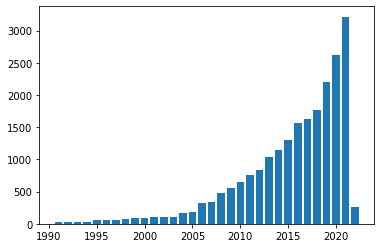

In [5]:
fig, ax = plt.subplots()

counts = df.query('PY>1990').groupby('PY')['id'].count()
ax.bar(counts.index, counts)

In [6]:
# Merge places with df

merged_df = df.merge(places,left_on="id",right_on="doc_id")
    
print(merged_df.shape)
merged_df.head()

(37417, 32)


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,...,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
0,4963912,Objective To explore the association between n...,Exploration of the association between meteoro...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,...,Shanghai,31.22222,121.45806,CHN,1796236.0,Shanghai,P,PPLA,4963912,Asia
1,4762134,Background: Despite declining age-adjusted str...,Mortality and Predictors of Death 1 Month and ...,2010.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,31.50000,34.75000,ISR,294640.0,State of Israel,A,PCLI,4762134,Asia
2,678134,Weather factors are widely studied for their e...,Statistical Modeling Reveals the Effect of Abs...,2014.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,1.36667,103.80000,SGP,1880251.0,Republic of Singapore,A,PCLI,678134,Asia
3,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,7.75000,80.75000,LKA,1227603.0,Democratic Socialist Republic of Sri Lanka,A,PCLI,1622376,Asia
4,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,22.00000,79.00000,IND,1269750.0,Republic of India,A,PCLI,1622376,Asia


In [7]:
eea_countries = [
    "AUT",
    "BEL",
    "BGR",
    "HRV",
    "CYP",
    "CZE",
    "DNK",
    "EST",
    "FIN",
    "FRA",
    "DEU",
    "GRC",
    "HUN",
    "ISL",
    "IRL",
    "ITA",
    "LVA",
    "LIE",
    "LTU",
    "LUX",
    "MLT",
    "NLD",
    "NOR",
    "POL",
    "PRT",
    "ROU",
    "SVK",
    "SVN",
    "ESP",
    "SWE",
    "CHE",
    "TUR",
    "ALB",
    "BIH",
    "XKX",
    "MNE",
    "MKD",
    "SRB",
    "GBR"
]

In [8]:
# Europe
edf = merged_df[merged_df['country_code3'].isin(eea_countries)]
print(edf.shape)
print(len(edf.doc_id.unique()))
edf.head()

(5290, 32)
3082


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,...,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
6,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,39.00000,22.00000,GRC,390903.0,Hellenic Republic,A,PCLI,1622376,Europe
14,4843745,"The health, economic, and social impact of COV...",Effects of air pollution and climatology on CO...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,40.00000,-4.00000,ESP,2510769.0,Kingdom of Spain,A,PCLI,4843745,Europe
42,495161,The average summer temperatures as well as the...,Heat wave hazard classification and risk asses...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,Attica,37.98376,23.72784,GRC,264371.0,Athens,P,PPLC,495161,Europe
43,495161,The average summer temperatures as well as the...,Heat wave hazard classification and risk asses...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,39.00000,22.00000,GRC,390903.0,Hellenic Republic,A,PCLI,495161,Europe
62,1299056,Background Anthropogenic greenhouse gas emissi...,Heat-related mortality trends under recent cli...,2018.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,40.00000,-4.00000,ESP,2510769.0,Kingdom of Spain,A,PCLI,1299056,Europe


,n,n-5,CAGR_5,CAGR_1990,CAGR_1995,CAGR_2000,CAGR_2005
PY,,,,,,,
2018.0,223,162.0,0.066002,0.350397,0.171051,0.129271,0.097188
2019.0,251,174.0,0.076031,0.337515,0.168611,0.129075,0.098663
2020.0,337,176.0,0.138737,0.337770,0.176750,0.138897,0.109734
2021.0,367,201.0,0.127961,0.324729,0.172417,0.136471,0.108739
2022.0,33,173.0,-0.282051,0.172258,0.043253,0.012700,-0.010902


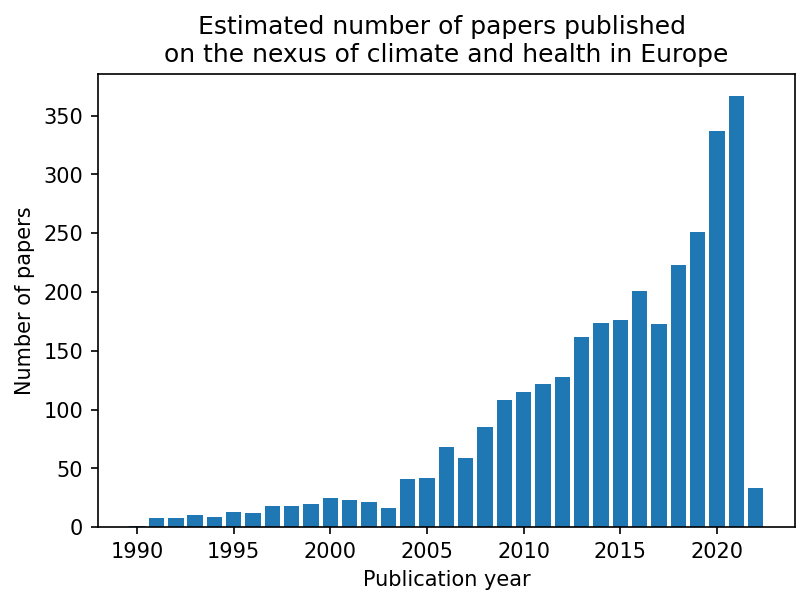

In [9]:
counts = df[df['id'].isin(edf['doc_id'])].groupby('PY')['id'].count()

fig, ax = plt.subplots(dpi=150)
ax.bar(counts.index, counts)

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')

def CAGR(first, last, periods):
    if periods > 0:
        return (last/first)**(1/periods)-1

counts = counts.to_frame("n")
counts['n-5'] = counts.shift(5)
counts['CAGR_5'] = counts.apply(lambda x: CAGR(x['n-5'],x['n'],5),axis=1)

for base_year in [1990,1995,2000,2005]:
    counts[f'CAGR_{base_year}'] = counts.apply(lambda x: CAGR(counts[counts.index==base_year]['n'].values[0],x['n'],x.name-2000), axis=1)
    
totals = counts.copy()
counts.tail()

In [10]:
base_year = 2000
counts[counts.index==base_year]['n'].values[0]

25

,1 - Mitigation,1 - Adaptation,1 - Impacts,Total unique papers
PY,,,,
2018.0,33.0,21.0,186,223
2019.0,43.0,16.0,208,251
2020.0,42.0,36.0,282,337
2021.0,55.0,26.0,312,367
2022.0,6.0,1.0,25,33


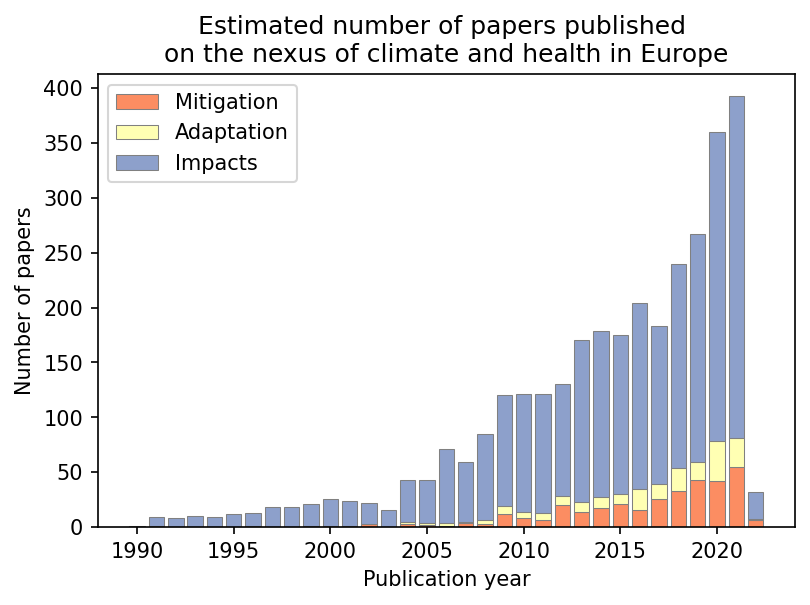

In [29]:
fig, ax = plt.subplots(dpi=150)
colors = ['#fc8d62','#ffffb3','#8da0cb']
all_counts = None
for i, c in enumerate(classes):
    counts = df[
        (df['id'].isin(edf['doc_id'])) & 
        (df[f'{c} - prediction']>0.5)
    ].groupby('PY')['id'].count().to_frame(c)
    
    if all_counts is not None:
        all_counts = all_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)
        bottom = all_counts[[x for x in all_counts.columns if x!=c]].sum(axis=1)
    else:
        all_counts = counts
        bottom = None
    
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    

    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Publication year')

    ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')
    
all_counts = all_counts.merge(totals['n'].rename("Total unique papers"),left_index=True, right_index=True)
ax.legend()
all_counts.tail()

In [30]:
all_counts.to_csv('data/scientific_papers_europe.csv')
all_counts.tail()

,1 - Mitigation,1 - Adaptation,1 - Impacts,Total unique papers
PY,,,,
2018.0,33.0,21.0,186,223
2019.0,43.0,16.0,208,251
2020.0,42.0,36.0,282,337
2021.0,55.0,26.0,312,367
2022.0,6.0,1.0,25,33


,id
PY,
1986.0,1
1987.0,1
1990.0,3
1991.0,21
1992.0,29
1993.0,31
1994.0,33
1995.0,61
1996.0,63


In [41]:
country_counts = pd.DataFrame()


for ccode in eea_countries:
    all_country_counts = None
    cdf = merged_df[merged_df['country_code3']==ccode]
    
    all_country_counts = (
        df[df['PY']>=1990].groupby('PY')['id'].count().to_frame().merge(
        df[(df['id'].isin(cdf['doc_id']))].groupby('PY')['id'].count().to_frame("Total unique documents"),
        left_index=True,right_index=True, how="outer"
    ).drop(columns="id"))
    
    for i, c in enumerate(classes):
        counts = df[
            (df['id'].isin(cdf['doc_id'])) & 
            (df[f'{c} - prediction']>0.5)
        ].groupby('PY')['id'].count().to_frame(c)
    
        all_country_counts = all_country_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)

            
    all_country_counts['country'] = ccode
    country_counts = pd.concat([country_counts,all_country_counts.reset_index()])
    
    
country_counts.to_csv('data/scientific_papers_europe_country.csv',index=False)
country_counts

,PY,Total unique documents,1 - Mitigation,1 - Adaptation,1 - Impacts,country
0,1990.0,0.0,0.0,0.0,0.0,AUT
1,1991.0,0.0,0.0,0.0,0.0,AUT
2,1992.0,1.0,0.0,0.0,1.0,AUT
3,1993.0,0.0,0.0,0.0,0.0,AUT
4,1994.0,1.0,0.0,0.0,1.0,AUT
...,...,...,...,...,...,...
28,2018.0,26.0,5.0,5.0,19.0,GBR
29,2019.0,33.0,5.0,3.0,28.0,GBR
30,2020.0,42.0,7.0,4.0,30.0,GBR
31,2021.0,44.0,9.0,3.0,36.0,GBR


In [33]:
all_country_counts

,Total unique documents,1 - Mitigation,1 - Adaptation,1 - Impacts,country
PY,,,,,


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


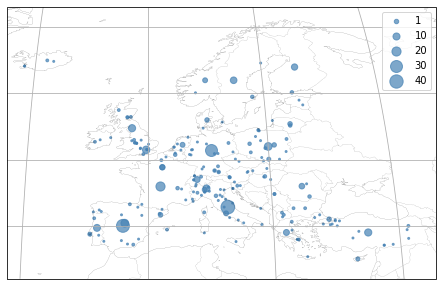

In [13]:
import cartopy
fig = plt.figure(figsize=(8,5))

p = ccrs.LambertConformal(
    central_longitude=0, central_latitude=52, false_easting=0.0, false_northing=0.0, 
    secant_latitudes=None, standard_parallels=(33, 45), globe=None, cutoff=-30
)

p = ccrs.EckertIII()


place_counts = edf[edf['PY']==2021].groupby(['lat', 'lon'])['doc_id'].count().sort_values().reset_index()
place_counts.head()

ax = plt.axes(projection=p)

ax.set_extent([-22,45,32,70])
ax.gridlines()

ax.add_feature(cartopy.feature.BORDERS, lw=0.2, linestyle=':')

M=5

bins = np.linspace(place_counts.doc_id.min(), place_counts.doc_id.max(), M)
#bins = np.array([1,50,100,150,200])
bins = np.array([1,10,20,30,40])
grouped = place_counts.groupby(np.digitize(place_counts.doc_id, bins))

for i, (name, group) in enumerate(grouped):
    
    ax.scatter(
        group['lon'], group['lat'], 
        transform=ccrs.PlateCarree(), 
        s=group['doc_id']*4,
        label=bins[i],
        alpha=0.7,
        color="steelblue"
    )
    
ax.legend(loc="upper right")


ax.coastlines(lw=0.1)

,1 - Impacts
PY,
2018.0,186
2019.0,208
2020.0,282
2021.0,312
2022.0,25


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


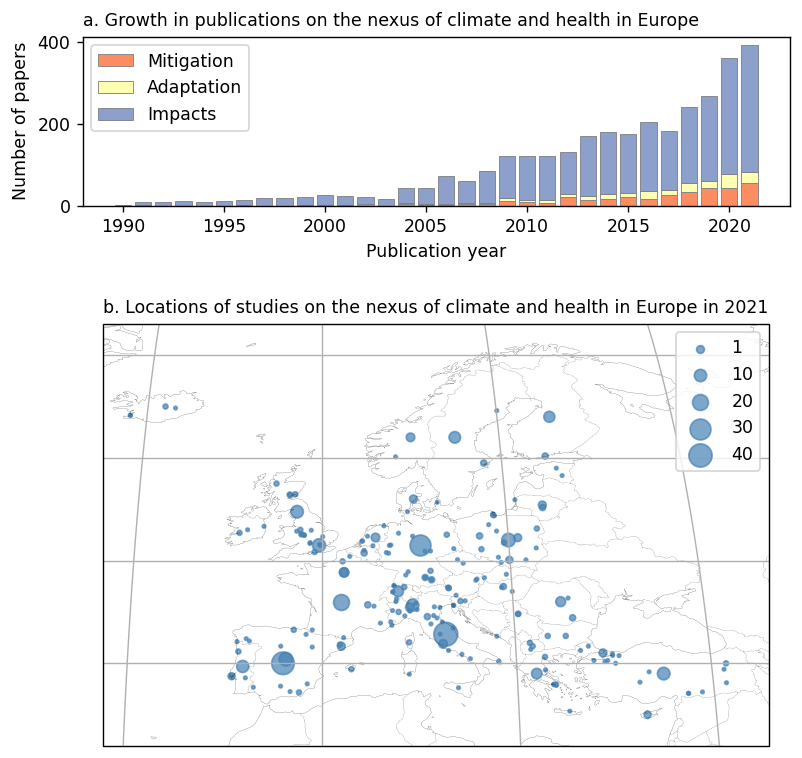

In [14]:
import matplotlib.gridspec as gridspec

tfs = 10

fig = plt.figure(dpi=125,figsize=(7.3,6.3))
gs = gridspec.GridSpec(2, 1, height_ratios=[.4, 1,], bottom=.05, top=.95, wspace=.2, hspace=.4)

ax = plt.subplot(gs[0,0])

all_counts = all_counts[all_counts.index<2022]

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    bottom += all_counts[c]   

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')  
ax.legend()

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('a. Growth in publications on the nexus of climate and health in Europe', loc="left", fontsize=tfs)

ax = plt.subplot(gs[1,0],projection=p)
ax.set_extent([-22,45,32,70])
ax.gridlines()
ax.add_feature(cartopy.feature.BORDERS, lw=0.2, linestyle=':')
ax.coastlines(lw=0.1)

for i, (name, group) in enumerate(grouped):
    
    ax.scatter(
        group['lon'], group['lat'], 
        transform=ccrs.PlateCarree(), 
        s=group['doc_id']*4,
        label=bins[i],
        alpha=0.7,
        color="steelblue"
    )
    
ax.legend(loc="upper right")

ax.set_title('b. Locations of studies on the nexus of climate and health in Europe in 2021', loc="left", fontsize=tfs)


counts.tail()

In [15]:
import geopandas
import cartopy.io.shapereader as shpreader



shpfilename = shpreader.natural_earth(
    resolution='10m',
    category='cultural',
    name='admin_0_countries'
)
adm0shps = geopandas.read_file(shpfilename,encoding='utf-8')
print(adm0shps.columns)
adm0shps.head()


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [16]:
edf.head()

,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,...,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,continent
6,1622376,Background Malaria is an important cause of il...,Mosquito larval source management for controll...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,39.00000,22.00000,GRC,390903.0,Hellenic Republic,A,PCLI,1622376,Europe
14,4843745,"The health, economic, and social impact of COV...",Effects of air pollution and climatology on CO...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,40.00000,-4.00000,ESP,2510769.0,Kingdom of Spain,A,PCLI,4843745,Europe
42,495161,The average summer temperatures as well as the...,Heat wave hazard classification and risk asses...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,Attica,37.98376,23.72784,GRC,264371.0,Athens,P,PPLC,495161,Europe
43,495161,The average summer temperatures as well as the...,Heat wave hazard classification and risk asses...,2013.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,39.00000,22.00000,GRC,390903.0,Hellenic Republic,A,PCLI,495161,Europe
62,1299056,Background Anthropogenic greenhouse gas emissi...,Heat-related mortality trends under recent cli...,2018.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,40.00000,-4.00000,ESP,2510769.0,Kingdom of Spain,A,PCLI,1299056,Europe


Text(0.0, 1.0, 'a. Number of publications on the nexus of climate and health in Europe')

/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


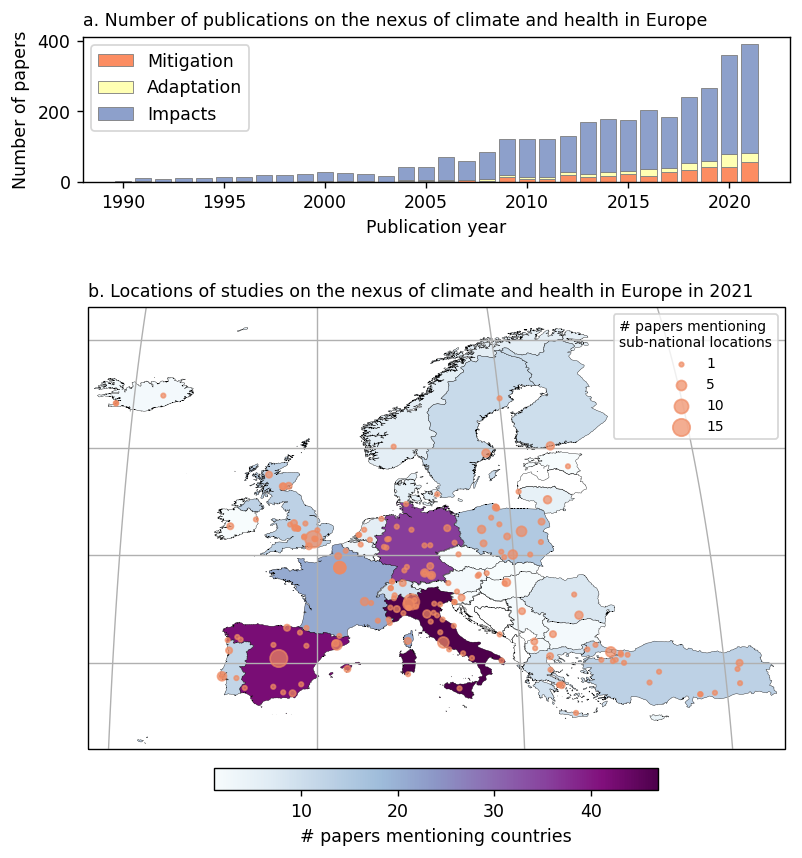

In [17]:
import matplotlib as mpl

fig = plt.figure(dpi=125,figsize=(7.3,6.7))
gs = gridspec.GridSpec(2, 1, height_ratios=[.3, 1,], bottom=.05, top=.95, wspace=.2, hspace=.4)

p = ccrs.EckertIII()
ax = plt.subplot(gs[1,0],projection=p)
ax.set_extent([-22,45,32,70])
ax.gridlines()

#ax.coastlines(lw=0.1)

place_counts = (edf[(edf['PY']==2021)]
                  .groupby(['lat', 'lon','country_code3','feature_code'])['doc_id']
                  .count()
                  .sort_values()
                  .reset_index()
                 )

country_counts = adm0shps.merge(place_counts[place_counts['feature_code']=="PCLI"],left_on="ADM0_A3",right_on="country_code3")
place_counts = place_counts[place_counts['feature_code']!="PCLI"]

cmap = mpl.cm.get_cmap('BuPu')
norm = mpl.colors.Normalize(vmin=country_counts['doc_id'].min(), vmax=country_counts['doc_id'].max())

#ax.add_geometries(merged.geometry, lw=0.1, linestyle=':',crs=ccrs.EqualEarth(),color=colors)
for i, row in country_counts.iterrows():
    ax.add_geometries(
        [row['geometry']],fc=cmap(norm(row['doc_id'])), 
        crs=ccrs.PlateCarree(),lw=0.2, ec="black"
    )
    
missing_countries = adm0shps[
    (adm0shps['ADM0_A3'].isin(eea_countries)) & 
    (~adm0shps['ADM0_A3'].isin(country_counts['ADM0_A3']))
]
for i, row in missing_countries.iterrows():
    ax.add_geometries(
        [row['geometry']],fc="None", 
        crs=ccrs.PlateCarree(), ec="black", lw=0.2
    )
    


cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax, orientation="horizontal",
    fraction=0.046, pad=0.04
)
cbar.set_label('# papers mentioning countries')

norm = mpl.colors.Normalize(vmin=0, vmax=place_counts['doc_id'].max())

ax.scatter(
    place_counts['lon'], place_counts['lat'], 
    transform=ccrs.PlateCarree(), 
    s=norm(place_counts['doc_id'])*100,
    alpha=0.7,
    color="#ef8a62",
    zorder=10
)

bins = np.array([1,5,10,15])

for bin_i in bins:
    
    ax.scatter(
        [],[], 
        transform=ccrs.PlateCarree(), 
        s=norm(bin_i)*100,
        label=bin_i,
        alpha=0.7,
        color="#ef8a62",
        zorder=10
    )
    
leg = ax.legend(title="# papers mentioning\nsub-national locations",fontsize=8)
leg.get_title().set_fontsize('8')
ax.set_title('b. Locations of studies on the nexus of climate and health in Europe in 2021', loc="left", fontsize=tfs)


ax = plt.subplot(gs[0,0])
all_counts = all_counts[all_counts.index<2022]

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    bottom += all_counts[c]   

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')  
ax.legend()

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('a. Number of publications on the nexus of climate and health in Europe', loc="left", fontsize=tfs)


In [41]:
shares = all_counts.copy()

for c in classes:
    shares[c] = shares[c] / totals['n']
    
shares.to_csv('data/shares_europe.csv')
shares

,1 - Mitigation,1 - Adaptation,1 - Impacts
PY,,,
1986.0,0.000000,0.000000,1.000000
1987.0,0.000000,0.000000,1.000000
1990.0,0.000000,0.000000,1.000000
1991.0,0.000000,0.047619,1.000000
1992.0,0.068966,0.000000,0.931034
1993.0,0.000000,0.000000,1.000000
1994.0,0.000000,0.000000,1.000000
1995.0,0.016393,0.000000,0.967213
1996.0,0.047619,0.031746,1.000000


In [20]:
growth = []
for name, group in edf.groupby('country_code3'):
    p21 = len(group[group['PY']==2021].doc_id.unique())
    p20 = len(group[group['PY']==2020].doc_id.unique())
    p5y = len(group[group['PY'].isin(np.arange(2014,2021))]) / 5
    growth.append({"country_code3": name, "p21":p21, "p20":p20, "p5y": p5y})
    
growth_df = pd.DataFrame.from_dict(growth)
growth_df['growth'] = growth_df['p21'] - growth_df['p5y']
growth_df['pgrowth'] = growth_df['growth'] / growth_df['p5y']
growth_df.sort_values('p21').tail()

,country_code3,p21,p20,p5y,growth,pgrowth
13,FRA,40,31,39.0,1.0,0.025641
14,GBR,44,42,49.0,-5.0,-0.102041
8,DEU,47,44,48.8,-1.8,-0.036885
10,ESP,65,70,78.2,-13.2,-0.168798
20,ITA,66,57,64.8,1.2,0.018519


In [21]:
edf.groupby('country_code3')['id'].nunique()

country_code3
ALB      8
AUT     56
BEL     74
BGR     20
BIH      8
CHE     78
CYP     27
CZE     30
DEU    309
DNK     46
ESP    495
EST     21
FIN     92
FRA    358
GBR    469
GRC    174
HRV     46
HUN     68
IRL     32
ISL     29
ITA    393
LTU     25
LUX      6
LVA      6
MKD     17
MLT      7
MNE      4
NLD     97
NOR     57
POL    136
PRT    138
ROU     51
SRB     41
SVK     19
SVN     19
SWE    136
TUR    127
XKX      7
Name: id, dtype: int64

## Institutions

In [22]:
dais = pd.read_csv('data/institutional_locations.csv')
dais.head()

,id,doc_id,surname,initials,AU,AF,institution,position,country,alpha_3,name,alpha_2
0,1217824,562,NaN,NaN,"Pinkerton, KE","Pinkerton, Kent E.","Univ Calif Davis, Ctr Hlth & Environm, Davis, ...",4,USA,USA,United States,US
1,1217742,562,NaN,NaN,"Thurston, GD","Thurston, George D.","NYU, Dept Environm Med, Sch Med, New York, NY ...",2,USA,USA,United States,US
2,1217830,562,NaN,NaN,"Pinkerton, KE","Pinkerton, Kent E.","Univ Calif Davis, John Muir Inst Environm, Dav...",4,USA,USA,United States,US
3,1217730,562,NaN,NaN,"Rice, MB","Rice, Mary B.","Harvard Univ, Beth Israel Deaconess Med Ctr, S...",1,USA,USA,United States,US
4,1217695,562,NaN,NaN,"Rice, MB","Rice, Mary B.","Massachusetts Gen Hosp, Pulm & Crit Care Unit,...",1,USA,USA,United States,US


PY
1995.0      1
1996.0      1
1997.0      1
1998.0      4
1999.0      2
2000.0      1
2001.0      3
2002.0      5
2003.0      6
2004.0      4
2005.0      2
2006.0      9
2007.0     29
2008.0    137
2009.0    175
2010.0    193
2011.0    235
2012.0    259
2013.0    332
2014.0    344
2015.0    373
2016.0    439
2017.0    445
2018.0    489
2019.0    569
2020.0    645
2021.0    819
2022.0     67
Name: id, dtype: int64


,n,n-5,CAGR_5,CAGR_1995,CAGR_2000,CAGR_2005
PY,,,,,,
2018.0,489,332.0,0.080523,0.410607,0.410607,0.357320
2019.0,569,344.0,0.105887,0.396387,0.396387,0.346363
2020.0,645,373.0,0.115758,0.381904,0.381904,0.334832
2021.0,819,439.0,0.132828,0.376347,0.376347,0.331659
2022.0,67,445.0,-0.315233,0.210608,0.210608,0.173060


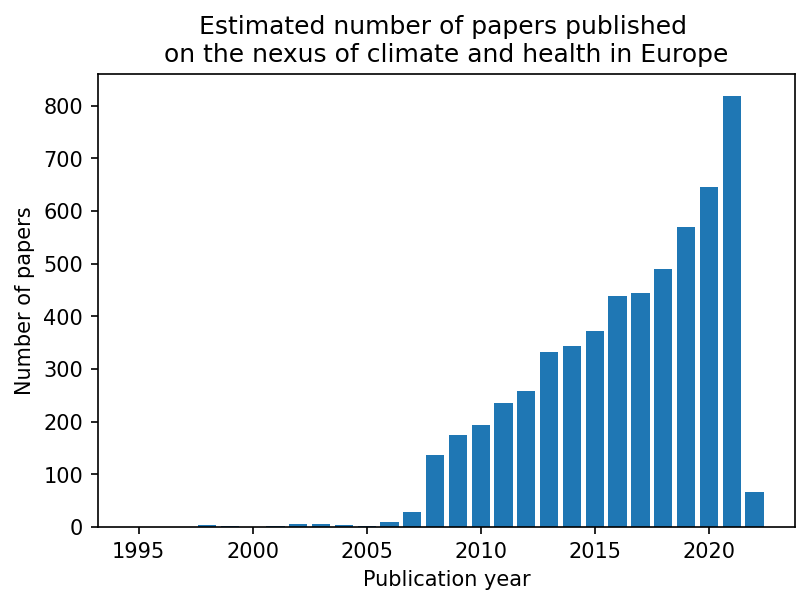

In [23]:
counts = df[df['id'].isin(
    dais[dais['alpha_3'].isin(eea_countries)]['doc_id']
)].groupby('PY')['id'].count()

print(counts)

fig, ax = plt.subplots(dpi=150)
ax.bar(counts.index, counts)

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')

def CAGR(first, last, periods):
    if periods > 0:
        return (last/first)**(1/periods)-1

counts = counts.to_frame("n")
counts['n-5'] = counts.shift(5)
counts['CAGR_5'] = counts.apply(lambda x: CAGR(x['n-5'],x['n'],5),axis=1)

for base_year in [1995,2000,2005]:
    counts[f'CAGR_{base_year}'] = counts.apply(lambda x: CAGR(counts[counts.index==base_year]['n'].values[0],x['n'],x.name-2000), axis=1)
counts.tail()

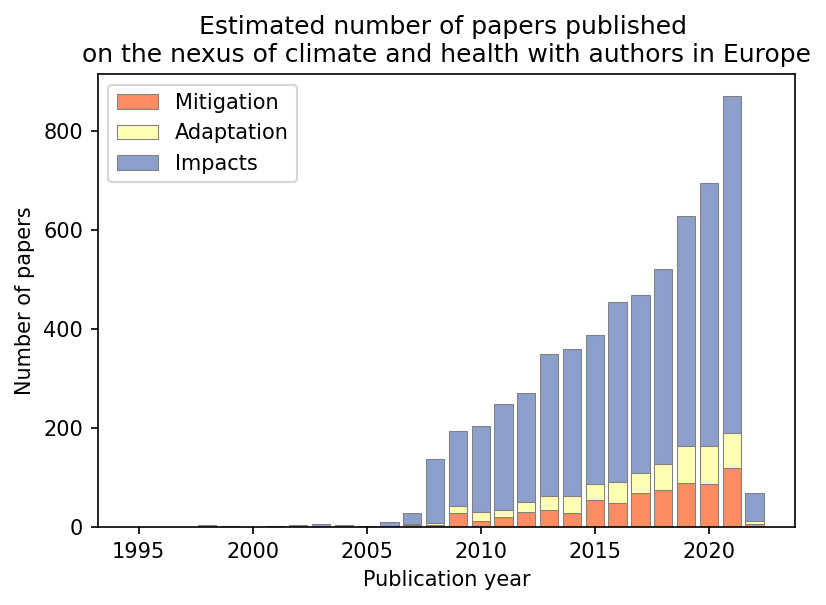

In [24]:
fig, ax = plt.subplots(dpi=150)
colors = ['#fc8d62','#ffffb3','#8da0cb']
all_counts = None
for i, c in enumerate(classes):
    counts = df[
        (df['id'].isin(dais[dais['alpha_3'].isin(eea_countries)]['doc_id'])) & 
        (df[f'{c} - prediction']>0.5)
    ].groupby('PY')['id'].count().to_frame(c)
    
    if all_counts is not None:
        all_counts = all_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)
        bottom = all_counts[[x for x in all_counts.columns if x!=c]].sum(axis=1)
    else:
        all_counts = counts
        bottom = None
    
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    

    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Publication year')

    ax.set_title('Estimated number of papers published \non the nexus of climate and health with authors in Europe')
    
ax.legend()

## Global

PY
1986.0       1
1987.0       1
1990.0       3
1991.0      21
1992.0      29
1993.0      31
1994.0      33
1995.0      61
1996.0      63
1997.0      64
1998.0      81
1999.0      88
2000.0      91
2001.0     102
2002.0     110
2003.0     100
2004.0     160
2005.0     179
2006.0     329
2007.0     343
2008.0     471
2009.0     556
2010.0     651
2011.0     762
2012.0     842
2013.0    1041
2014.0    1148
2015.0    1306
2016.0    1563
2017.0    1628
2018.0    1769
2019.0    2193
2020.0    2614
2021.0    3214
2022.0     263
Name: id, dtype: int64


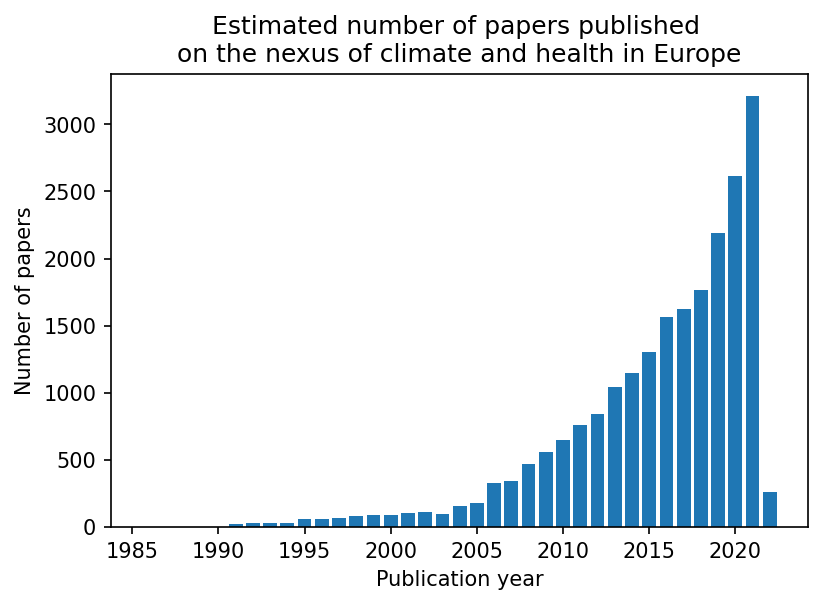

In [25]:
counts = df.groupby('PY')['id'].count()

print(counts)

fig, ax = plt.subplots(dpi=150)
ax.bar(counts.index, counts)

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')

def CAGR(first, last, periods):
    if periods > 0:
        return (last/first)**(1/periods)-1

counts = counts.to_frame("n")
counts['n-5'] = counts.shift(5)
counts['pgrowth'] = (counts['n'] - counts['n'].shift(1)) / counts['n'].shift(1)
counts['CAGR_5'] = counts.apply(lambda x: CAGR(x['n-5'],x['n'],5),axis=1)


for base_year in [1995,2000,2005]:
    counts[f'CAGR_{base_year}'] = counts.apply(lambda x: CAGR(counts[counts.index==base_year]['n'].values[0],x['n'],x.name-2000), axis=1)
counts.tail()

totals = counts.copy()

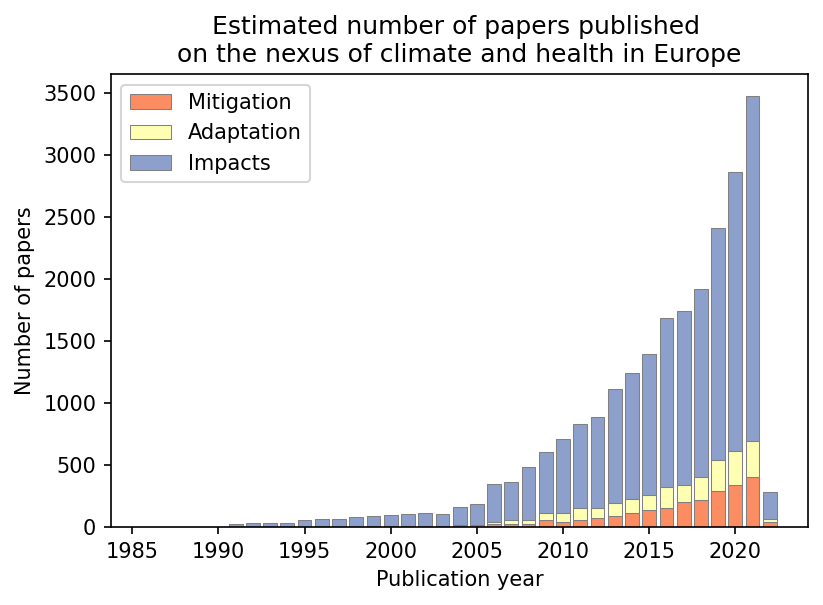

In [26]:
fig, ax = plt.subplots(dpi=150)
colors = ['#fc8d62','#ffffb3','#8da0cb']
all_counts = None
for i, c in enumerate(classes):
    counts = df[
        #(df['id'].isin(edf['doc_id'])) & 
        (df[f'{c} - prediction']>=0.5)
    ].groupby('PY')['id'].count().to_frame(c)
    
    if all_counts is not None:
        all_counts = all_counts.merge(counts, left_index=True, right_index=True, how="outer").fillna(0)
        bottom = all_counts[[x for x in all_counts.columns if x!=c]].sum(axis=1)
    else:
        all_counts = counts
        bottom = None
    
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    

    ax.set_ylabel('Number of papers')
    ax.set_xlabel('Publication year')

    ax.set_title('Estimated number of papers published \non the nexus of climate and health in Europe')
    
ax.legend()

In [27]:
place_counts = merged_df[merged_df['PY']==2021].groupby(['lat', 'lon'])['doc_id'].count().sort_values().reset_index()
place_counts.head()

M=5

bins = np.linspace(place_counts.doc_id.min(), place_counts.doc_id.max(), M)
bins = np.array([1,50,100,150,200])
#bins = np.array([1,10,20,30,40])
grouped = place_counts.groupby(np.digitize(place_counts.doc_id, bins))

,1 - Impacts
PY,
2018.0,1522
2019.0,1871
2020.0,2248
2021.0,2786
2022.0,219


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


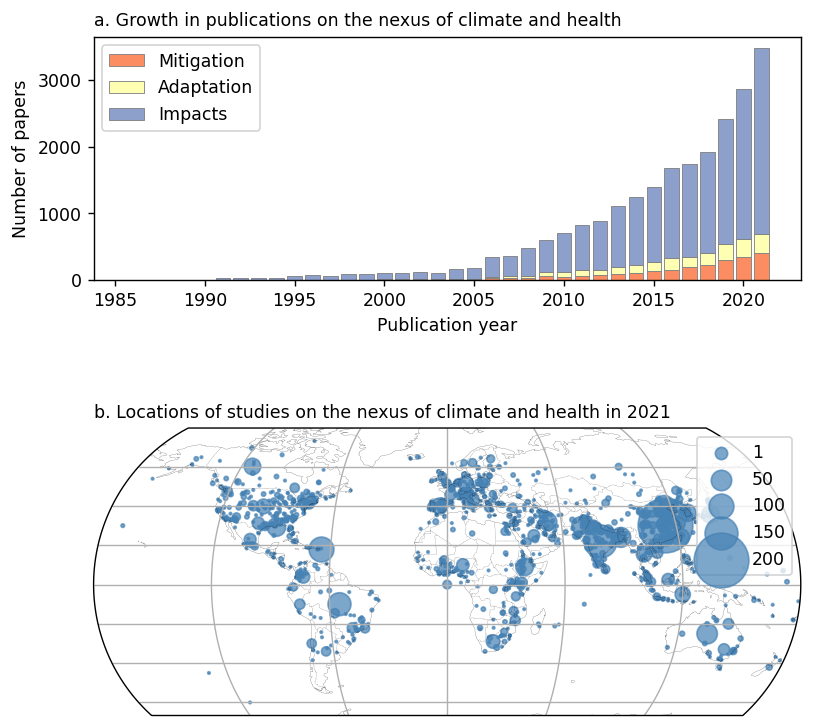

In [28]:
import matplotlib.gridspec as gridspec

tfs = 10

fig = plt.figure(dpi=125,figsize=(7.3,6.3))
gs = gridspec.GridSpec(2, 1, height_ratios=[.7, 1,], bottom=.05, top=.95, wspace=.2, hspace=.4)

ax = plt.subplot(gs[0,0])

all_counts = all_counts[all_counts.index<2022]

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.index, all_counts[c], 
        bottom=bottom, label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5
    )
    bottom += all_counts[c]   

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')  
ax.legend()

ax.set_ylabel('Number of papers')
ax.set_xlabel('Publication year')

ax.set_title('a. Growth in publications on the nexus of climate and health', loc="left", fontsize=tfs)

ax = plt.subplot(gs[1,0],projection=p)
#ax.set_extent([-22,45,32,70])
ax.gridlines()
ax.add_feature(cartopy.feature.BORDERS, lw=0.2, linestyle=':')
ax.coastlines(lw=0.1)

for i, (name, group) in enumerate(grouped):
    
    ax.scatter(
        group['lon'], group['lat'], 
        transform=ccrs.PlateCarree(), 
        s=group['doc_id']*2,
        label=bins[i],
        alpha=0.7,
        color="steelblue"
    )
    
ax.legend(loc="upper right")

ax.set_title('b. Locations of studies on the nexus of climate and health in 2021', loc="left", fontsize=tfs)


counts.tail()

In [29]:
who_regions = pd.read_csv('data/who-regions.csv')
who_regions

,Entity,Code,Year,WHO region
0,Afghanistan,AFG,2017,Eastern Mediterranean
1,Albania,ALB,2017,Europe
2,Algeria,DZA,2017,Africa
3,Andorra,AND,2017,Europe
4,Angola,AGO,2017,Africa
...,...,...,...,...
189,Venezuela,VEN,2017,Americas
190,Vietnam,VNM,2017,Western Pacific
191,Yemen,YEM,2017,Eastern Mediterranean
192,Zambia,ZMB,2017,Africa


In [30]:
if "WHO region" not in merged_df:
    merged_df = merged_df.merge(who_regions.rename(columns={"Code": "country_code3"})[["country_code3","WHO region"]])
    
py_who = merged_df.groupby(['PY','WHO region'])['id'].nunique()
py_who

PY      WHO region           
1986.0  Europe                    1
1990.0  Africa                    1
        Americas                  1
        Europe                    1
1991.0  Africa                    3
                                 ..
2022.0  Americas                 46
        Eastern Mediterranean    18
        Europe                   35
        South-East Asia          21
        Western Pacific          78
Name: id, Length: 194, dtype: int64

Text(0.5, 1.0, 'Estimated number of papers published on the\n nexus of climate and health by WHO region studied in 2021')

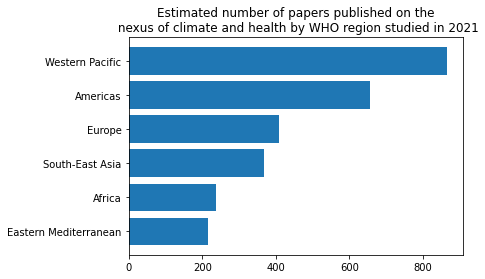

In [31]:
fig, ax = plt.subplots()

y = py_who[2021.0].sort_values().reset_index()
ax.barh(y.index,y['id'])

ax.set_yticks(y.index)
ax.set_yticklabels(y['WHO region'])

ax.set_title('Estimated number of papers published on the\n nexus of climate and health by WHO region studied in 2021')

In [32]:
y

,WHO region,id
0,Eastern Mediterranean,216
1,Africa,237
2,South-East Asia,369
3,Europe,409
4,Americas,655
5,Western Pacific,866


In [33]:
if "WHO region" not in dais:
    dais = dais.merge(who_regions.rename(columns={"Code": "alpha_3"})[["alpha_3","WHO region"]])
    
if "PY" not in dais:
    dais = dais.merge(df.rename(columns={"id": "doc_id"})[['doc_id','PY']])
    
dais.head()

,id,doc_id,surname,initials,AU,AF,institution,position,country,alpha_3,name,alpha_2,WHO region,PY
0,1217824,562,NaN,NaN,"Pinkerton, KE","Pinkerton, Kent E.","Univ Calif Davis, Ctr Hlth & Environm, Davis, ...",4,USA,USA,United States,US,Americas,2014.0
1,1217742,562,NaN,NaN,"Thurston, GD","Thurston, George D.","NYU, Dept Environm Med, Sch Med, New York, NY ...",2,USA,USA,United States,US,Americas,2014.0
2,1217830,562,NaN,NaN,"Pinkerton, KE","Pinkerton, Kent E.","Univ Calif Davis, John Muir Inst Environm, Dav...",4,USA,USA,United States,US,Americas,2014.0
3,1217730,562,NaN,NaN,"Rice, MB","Rice, Mary B.","Harvard Univ, Beth Israel Deaconess Med Ctr, S...",1,USA,USA,United States,US,Americas,2014.0
4,1217695,562,NaN,NaN,"Rice, MB","Rice, Mary B.","Massachusetts Gen Hosp, Pulm & Crit Care Unit,...",1,USA,USA,United States,US,Americas,2014.0


In [34]:
py_who_dai = dais.groupby(['PY','WHO region'])['doc_id'].nunique()
py_who_dai

PY      WHO region           
1990.0  Africa                    1
1994.0  Africa                    1
1995.0  Europe                    1
1996.0  Africa                    1
        Europe                    1
                                 ..
2022.0  Americas                 76
        Eastern Mediterranean    13
        Europe                   69
        South-East Asia          22
        Western Pacific          64
Name: doc_id, Length: 135, dtype: int64

Text(0.5, 1.0, 'Estimated number of papers published on the\n nexus of climate and health by WHO region of author in 2021')

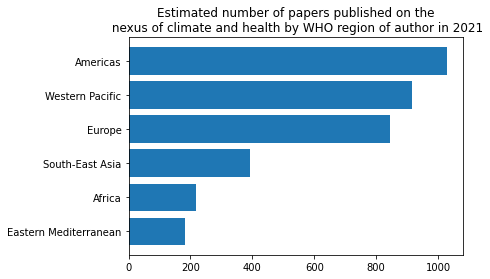

In [35]:
fig, ax = plt.subplots()

y = py_who_dai[2021.0].sort_values().reset_index()
ax.barh(y.index,y['doc_id'])

ax.set_yticks(y.index)
ax.set_yticklabels(y['WHO region'])

ax.set_title('Estimated number of papers published on the\n nexus of climate and health by WHO region of author in 2021')

In [36]:
y

,WHO region,doc_id
0,Eastern Mediterranean,183
1,Africa,218
2,South-East Asia,393
3,Europe,845
4,Western Pacific,914
5,Americas,1030


In [37]:
shares = all_counts.copy()

for c in classes:
    shares[c] = shares[c] / totals['n']
    
shares.to_csv('data/global_shares.csv')
shares

,1 - Mitigation,1 - Adaptation,1 - Impacts
PY,,,
1986.0,0.000000,0.000000,1.000000
1987.0,0.000000,0.000000,1.000000
1990.0,0.000000,0.000000,1.000000
1991.0,0.000000,0.047619,1.000000
1992.0,0.068966,0.000000,0.931034
1993.0,0.000000,0.000000,1.000000
1994.0,0.000000,0.000000,1.000000
1995.0,0.016393,0.000000,0.967213
1996.0,0.047619,0.031746,1.000000


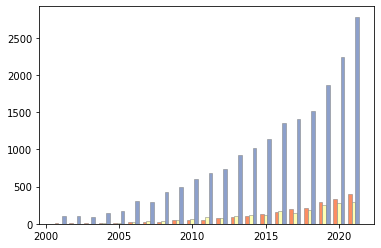

In [38]:
fig, ax = plt.subplots()

bottom = 0
for i, c in enumerate(classes):
    ax.bar(
        all_counts.query('index>2000').index+i*.25-.25, all_counts.query('index>2000')[c], label=c.split(' - ')[1],
        color=colors[i], ec="grey",lw=0.5, width=0.25
    )

In [39]:
dais[dais['country']=="China"].doc_id.nunique()

3040

In [40]:
merged_df[merged_df['country_code3']=="CHN"].doc_id.nunique()

2976